# Rosa de Viento


In [1]:
# Dar acceso a los archivos de Drive:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


# Rosa de Viento de los Archivos de Salida del Modelo NetCDF en la Ubicación de la Estación Asignada

In [9]:
# Importar las librerias a usar
import pandas
!pip install netCDF4
from netCDF4 import Dataset
import numpy
#import matplotlib
#import matplotlib.pyplot as plt

In [6]:
# Abrir el archivo que vamos a usar para graficar.
datos = Dataset('/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/wrfout_d04_2025-03-18.nc')

In [16]:
# Llamar el archivo de excel y la hoja donde están los datos de ubicación de las estaciones de monitoreo
Estaciones = pandas.read_excel('/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/EstacionesBogota.xlsx', sheet_name='Ubic_Estaciones', index_col=False, header=0)
UBI_ESTACIONES = Estaciones.set_index('ESTACIONES')
print(UBI_ESTACIONES)

            NUMERO   LATITUD   LONGITUD  XLAT  XLONG
ESTACIONES                                          
Carvajal        CV  4.595616 -74.148583    28     29
CentAltoRen     CA  4.658467 -74.083966    35     37
Guaymaral       GU  4.783756 -74.044183    49     41
Kennedy         KE  4.621667 -74.161333    31     28
LasFerias       LF  4.690700 -74.082483    39     37
PuentAranda     PA  4.631767 -74.117483    32     33
SanCrist        SC  4.572553 -74.083813    26     37
Suba            SU  4.761247 -74.093461    47     36
Tunal           TU  4.576225 -74.130955    26     31
Usaquen         US  4.710350 -74.030417    41     43
Movil7ma        M7  4.645361 -74.061679    34     39
Fontibon        FO  4.670121 -74.141361    36     30
MinAmb          MA  4.625385 -74.067185    31     39


In [17]:
#******************************
# Modifique el nombre de la estación tal cual esta en la tabla de excel anterior dentro de las comillas.
nombre_estacion = "Tunal"
#*****************************

cel_lat = int(UBI_ESTACIONES.loc[nombre_estacion]['XLAT'])
cel_lon = int(UBI_ESTACIONES.loc[nombre_estacion]['XLONG'])

print(cel_lat, cel_lon)

26 31


In [21]:
variables = datos.variables.keys()

for v in variables:
  print(v)

Times
XLAT
XLONG
LU_INDEX
ZNU
ZNW
ZS
DZS
VAR_SSO
U
V
W
PH
PHB
T
HFX_FORCE
LH_FORCE
TSK_FORCE
HFX_FORCE_TEND
LH_FORCE_TEND
TSK_FORCE_TEND
MU
MUB
NEST_POS
P
PB
FNM
FNP
RDNW
RDN
DNW
DN
CFN
CFN1
THIS_IS_AN_IDEAL_RUN
P_HYD
Q2
T2
TH2
PSFC
U10
V10
RDX
RDY
RESM
ZETATOP
CF1
CF2
CF3
ITIMESTEP
XTIME
QVAPOR
QCLOUD
QRAIN
SHDMAX
SHDMIN
SNOALB
TSLB
SMOIS
SH2O
SMCREL
SEAICE
XICEM
SFROFF
UDROFF
IVGTYP
ISLTYP
VEGFRA
GRDFLX
ACGRDFLX
ACSNOM
SNOW
SNOWH
CANWAT
SSTSK
COSZEN
LAI
VAR
MAPFAC_M
MAPFAC_U
MAPFAC_V
MAPFAC_MX
MAPFAC_MY
MAPFAC_UX
MAPFAC_UY
MAPFAC_VX
MF_VX_INV
MAPFAC_VY
F
E
SINALPHA
COSALPHA
HGT
TSK
P_TOP
T00
P00
TLP
TISO
TLP_STRAT
P_STRAT
MAX_MSTFX
MAX_MSTFY
RAINC
RAINSH
RAINNC
SNOWNC
GRAUPELNC
HAILNC
CLDFRA
SWDOWN
GLW
SWNORM
OLR
XLAT_U
XLONG_U
XLAT_V
XLONG_V
ALBEDO
CLAT
ALBBCK
EMISS
NOAHRES
TMN
XLAND
UST
PBLH
HFX
QFX
LH
ACHFX
ACLHF
SNOWC
SR
SAVE_TOPO_FROM_REAL
ISEEDARR_SPPT
ISEEDARR_SKEBS
ISEEDARR_RAND_PERTURB
ISEEDARRAY_SPP_CONV
ISEEDARRAY_SPP_PBL
ISEEDARRAY_SPP_LSM
BF
C1H
C2H
BH
C1F
C2F
C3H
C4H
C3

### **Velocidad y Dirección del Viento**

Para la rosa de vientos necesitamos los datos de dirección y velocidad y el
archivo trae las componentes de U y V y se deben calcular.

Las componentes U y V del viento al leerlas con la librería netCDF4 se leen como numpy.ma.MaskedArray, con este tipo de datos se puede calcular fácilmente de la siguiente manera:

**Velocidad del viento:** usando el teorema de Pitágoras

$\text{Velocidad} = \sqrt{U^2 + V^2}$


**Dirección del viento:** usando funciones trigonométricas (corrigiendo el ángulo para que sea meteorológico)


$\text{Dirección} = \arctan2(-U, -V)$


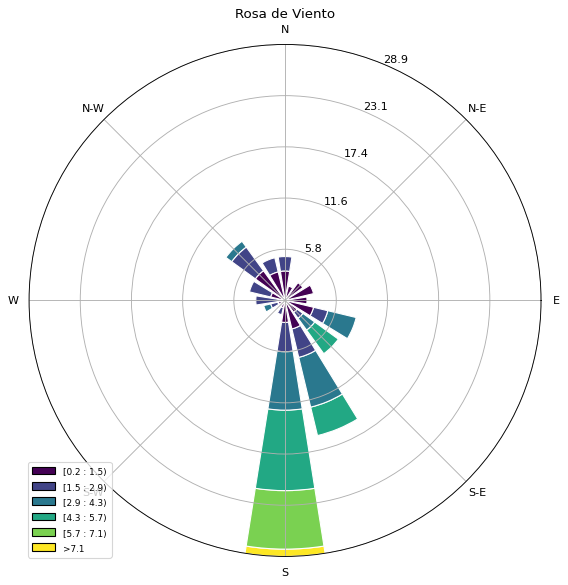

In [27]:
!pip install windrose
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes

U = (datos.variables['U10'][:,cel_lat,cel_lon])
V = (datos.variables['V10'][:,cel_lat,cel_lon])

# Velocidad del viento (magnitud)
WS = np.sqrt(U**2 + V**2)

# Dirección del viento (en grados meteorológicos)
wind_dir_rad = np.arctan2(-U, -V)  # arctan2(y, x)
wind_dir_deg = np.degrees(wind_dir_rad)
# Asegurar que esté en el rango 0–360
WD = (wind_dir_deg + 360) % 360


# Crear gráfico
ax = WindroseAxes.from_ax()
ax.bar(WD, WS, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Rosa de Viento")
plt.show()

# Rosa de Viento de las Observaciones de la Estación de Monitoreo Asignada

Para esto usaremos el Excel

In [29]:
# Nombre de las hojas del excel con los datos de las estaciones
xl = pandas.ExcelFile('/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/EstacionesBogota.xlsx')
xl.sheet_names

['Ubic_Estaciones',
 'Carvajal',
 'CentAltoRen',
 'LasFerias',
 'Fontibon',
 'Guaymaral',
 'Kennedy',
 'MinAmb',
 'Movil7ma',
 'PuentAranda',
 'SanCrist',
 'Suba',
 'Tunal',
 'Usaquen']

In [30]:
# Llamar el archivo de excel y la hoja donde están los datos de ubicación de las estaciones de monitoreo

#**********************************************
# Coloque el nombre de la hoja de Excel con la estación de monitoreo que le fue asiganda entre las comillas.
nombre_estacion = "Tunal"
#**********************************************

Mi_estacion = pandas.read_excel('/gdrive/My Drive/METEOROLOGIA/Taller_WRF/data/EstacionesBogota.xlsx', sheet_name=nombre_estacion, index_col=False, header=0)
print(Mi_estacion)

                   date  PM10   CO  SO2   WS     WD  Temp_4m  Precipitacion  \
0   2020-03-14 01:00:00  42.0  0.4  1.2  0.7  243.0     13.7            0.0   
1   2020-03-14 02:00:00  17.0  0.3  0.9  0.9  228.0     13.4            0.0   
2   2020-03-14 03:00:00  27.0  0.3  1.1  1.0  131.0     13.2            0.0   
3   2020-03-14 04:00:00   4.0  0.2  0.8  1.5   97.0     12.8            0.0   
4   2020-03-14 05:00:00   5.0  0.2  0.8  1.1   89.0     12.7            0.0   
..                  ...   ...  ...  ...  ...    ...      ...            ...   
787 2020-04-15 20:00:00  45.0  0.6  1.3  1.6  237.0     15.3            0.0   
788 2020-04-15 21:00:00  51.0  0.5  1.4  1.9  216.0     14.7            0.0   
789 2020-04-15 22:00:00  39.0  0.5  1.0  1.0  216.0     14.4            0.0   
790 2020-04-15 23:00:00  38.0  0.5  0.9  1.0  155.0     13.3            0.0   
791 2020-04-16 00:00:00  48.0  0.4  0.8  0.8  142.0     12.0            0.0   

      NO   NO2   NOX    RH    O3  PM25    T2  HR  R

NameError: name 'matplotlib' is not defined

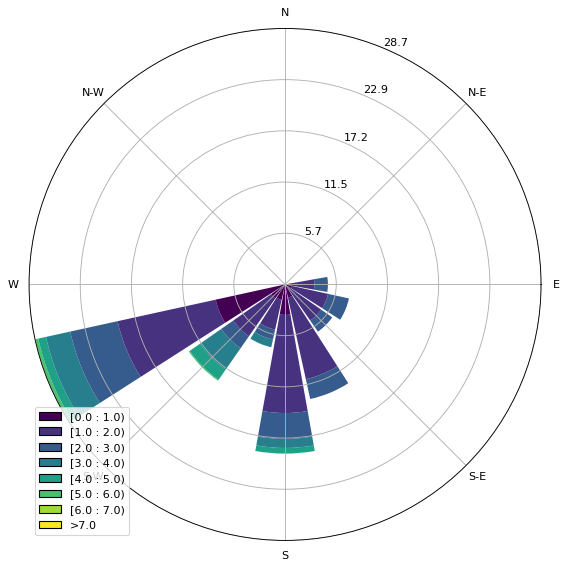

In [32]:
# Graficar la Rosa de Viento de la Estación Asignada

ax = WindroseAxes.from_ax()
ax.bar(Mi_estacion.WD, Mi_estacion.WS, normed=True, opening=0.9, edgecolor='None', bins=numpy.arange(0, 8, 1))
ax.legend()

matplotlib.pyplot.savefig("/gdrive/My Drive/METEOROLOGIA/Taller_WRF/Imagenes/RosaViento_MiEstacion.png", dpi=100, bbox_inches='tight', transparent=True)